# Data Exploration
## Dataset

In [6]:
import pandas as pd

df = pd.read_csv('../data/labels_int.csv')
df = df.sample(frac=1).reset_index(drop=True)
df

,Unnamed: 0,seal_id,rec_name,rhonchus_l,rhonchus_r,whistling_l,whistling_r
0,30,PV19011,PV19011_040119,3,3,0,0
1,38,PV19061,PV19061_240119,0,0,0,0
2,5,PV18246,PV18246_161218,1,2,1,1
3,68,PV21036,PV21036_200221,2,2,0,0
4,17,PV18263,PV18263_261218,3,3,1,1
...,...,...,...,...,...,...,...
66,32,PV19016,PV19016_050119,1,0,0,0
67,28,PV19006,PV19006_030119,1,1,0,0
68,23,PV18272,PV18272_311218,1,2,1,0
69,2,PV18236,PV18236_091218,0,0,0,1


## Distribution

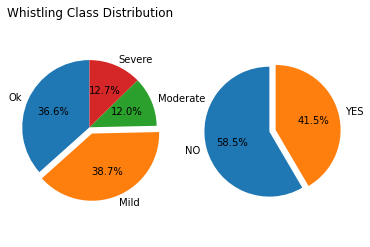

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
r_explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
w_explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

rhonchus_labels = ['Ok', 'Mild', 'Moderate', 'Severe']
whistling_labels = ['NO', 'YES']

rhonchus_count = df['rhonchus_l'].append(df['rhonchus_r']).value_counts().sort_index()
whistling_count = df['whistling_l'].append(df['whistling_r']).value_counts().sort_index()

fig, ax = plt.subplots(ncols=2, facecolor='w')

ax[0].pie(rhonchus_count, explode=r_explode, labels=rhonchus_labels, autopct='%1.1f%%',
          shadow=False, startangle=90)
ax[0].axis('equal')
ax[0].set_title("Rhonchus Class Distribution")

ax[1].pie(whistling_count, explode=w_explode, labels=whistling_labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax[1].axis('equal')
ax[0].set_title("Whistling Class Distribution")

plt.savefig('class_distribution.png')

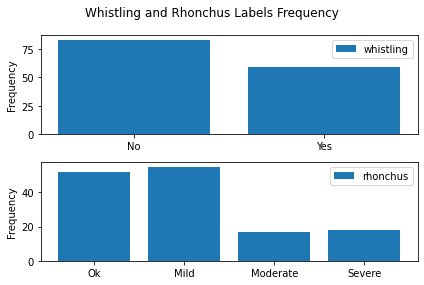

In [4]:
import matplotlib.pyplot as plt
import numpy as np

rhonchus_count = df['rhonchus_l'].append(df['rhonchus_r']).value_counts().sort_index()
whistling_count = df['whistling_l'].append(df['whistling_r']).value_counts().sort_index()

labels = [['No', 'Yes'], ['Ok', 'Mild', 'Moderate', 'Severe']]

width = 0.35  # the width of the bars

fig, axs = plt.subplots(2)
fig.suptitle('Whistling and Rhonchus Classes Frequency')
axs[0].bar(labels[0], whistling_count, label='whistling')
axs[1].bar(labels[1], rhonchus_count, label='rhonchus')

for i in range(2):
    axs[i].set_ylabel('Frequency')
    axs[i].legend()
    
fig.tight_layout()
plt.savefig("data_barplot.png")
plt.show()

# Methodology
## Data Augmentation

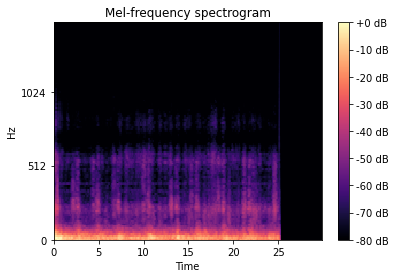

In [12]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import numpy as np
import matplotlib.pyplot as plt
import librosa
from librosa import display

SAMPLE_RATE = 4000

augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_fraction=0.5, max_fraction=0.5, p=0.5)
])

fig, ax = plt.subplots()

y, sr = librosa.load("../data/recordings/PV21023/PV21023_R.wav", sr=None)

# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=augment(y, 4000), sr=sr, n_mels=128, fmax=2000)
S_dB = librosa.power_to_db(S, ref=np.max)
img = display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=2000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')

ax.set(title='Mel-frequency spectrogram')
plt.show()

## PCEN Mel-Spectrograms

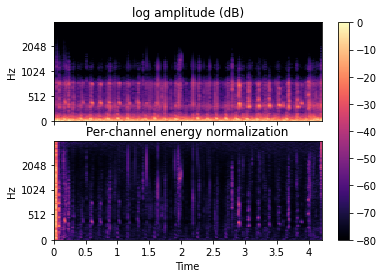

In [66]:
import matplotlib.pyplot as plt
import librosa, librosa.display
import numpy as np

y, sr = librosa.load("../data/recordings/PV21009/PV21009_L.wav", sr=None)

# We recommend scaling y to the range [-2**31, 2**31[ before applying
# PCEN's default parameters. Furthermore, we use power=1 to get a
# magnitude spectrum instead of a power spectrum.
S = librosa.feature.melspectrogram(y, sr=sr, power=1)
log_S = librosa.amplitude_to_db(S, ref=np.max)
pcen_S = librosa.pcen(S * (2**31))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
img = librosa.display.specshow(log_S, x_axis='time', y_axis='mel', ax=ax[0], fmax=4000)
ax[0].set(title='log amplitude (dB)', xlabel=None)
ax[0].label_outer()
imgpcen = librosa.display.specshow(pcen_S, x_axis='time', y_axis='mel', ax=ax[1], fmax=4000)
ax[1].set(title='Per-channel energy normalization')
fig.colorbar(img, ax=ax)
plt.show()

In [30]:
y, sr = librosa.load('../src/data/recordings/PV19058/PV19058_230119_L.wav', sr=None)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
y2, sr2 = librosa.load('../src/data/recordings/PV21027/PV21027_110221_R.wav', sr=None)
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=20)

FileNotFoundError: [Errno 2] No such file or directory: '../src/data/recordings/PV19058/PV19058_230119_L.wav'